This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

-1.Which company is the most common video game publisher?
-2.What's the most common platform?
-3.What's the most common genere?
-4.What are the top 20 grossing games?
-5.For North American games, what is the median?
-6.For the top-selling game of all time, how many standard deviations above/below the mean are its sales in North America?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


1.Data Gathering

In [2]:
data = pd.read_csv("vgsales.csv")
#Reading Excel file of Video games Sales dataset
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
data.head()#Printing first 5 records


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.info()#Here we can view all the columns of information we have access to in this data frame
#Here we check count, null status and data type of the data in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In This data set there are 11 cloumns
Total Entries in dataset 16598
you can see there is missing value in Year and Publisher column
Genre and platform both are categorical 



In [5]:
data.dtypes#dtypes help me to show data types of the all columns

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Describe Method help me show Statstics Calculation i.e (Satndard Deviation,min,max etc.)




In [7]:
data.shape

(16598, 11)

2.Handling Missing values


In [8]:
data.isnull().sum()#Checking null values
#as you can there is 271 null values in Year column
#58 null values in Publisher column

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
data["Year"].mean()

2006.4064433147546

In [10]:
data['Year'].fillna(data['Year'].mean(),inplace=True)

In [11]:
data['Year'].isnull().sum()

0

In [12]:
data['Year'] = data['Year'].astype(int)

Q1.Which company is the most common video game publisher?

In [13]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Marvelous Games                    1
Merscom LLC                        1
Phantom EFX                        1
PopTop Software                    1
Ertain                             1
Name: Publisher, Length: 578, dtype: int64

In [14]:
data['Publisher'].mode()

0    Electronic Arts
dtype: object

Electronic Arts Publish most common video games.

Q.2 What's the most common platform?

In [15]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [16]:
data['Platform'].mode()# as you can see DS is most common platform

0    DS
dtype: object

Q.3  What's the most common genere?

In [17]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [18]:
data['Genre'].mode()#Action is most common Genre

0    Action
dtype: object

Q.4 What are the top 20 grossing games?

In [19]:
data[['Name','Platform','Global_Sales']].sort_values('Global_Sales' , ascending=False)[:20]

,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.74
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.82
3,Wii Sports Resort,Wii,33.00
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,30.01
7,Wii Play,Wii,29.02
8,New Super Mario Bros. Wii,Wii,28.62
9,Duck Hunt,NES,28.31


Q.5 For North American games, what is the median?

In [20]:
data['NA_Sales'].median()

0.08

Q.6 For the top-selling game of all time, how many standard deviations above/below the mean are its sales in North America?

In [21]:
data['NA_Sales'].describe()

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [22]:
a=data.groupby(['Year'])
a

In [23]:
for i in a:
    print(i)

(1980,       Rank             Name Platform  ...  JP_Sales Other_Sales Global_Sales
258    259        Asteroids     2600  ...       0.0        0.05         4.31
544    545  Missile Command     2600  ...       0.0        0.03         2.76
1766  1768          Kaboom!     2600  ...       0.0        0.01         1.15
1969  1971         Defender     2600  ...       0.0        0.01         1.05
2669  2671           Boxing     2600  ...       0.0        0.01         0.77
4025  4027       Ice Hockey     2600  ...       0.0        0.01         0.49
5366  5368          Freeway     2600  ...       0.0        0.00         0.34
6317  6319           Bridge     2600  ...       0.0        0.00         0.27
6896  6898         Checkers     2600  ...       0.0        0.00         0.24

[9 rows x 11 columns])
(1981,       Rank                                Name  ... Other_Sales  Global_Sales
239    240                            Pitfall!  ...        0.05          4.50
734    736                          

In [24]:
b = a.get_group(2005)
b

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
...,...,...,...,...,...,...,...,...,...,...,...
16335,16338,Whac-A-Mole,GBA,2005,Puzzle,Zoo Digital Publishing,0.01,0.00,0.00,0.00,0.01
16351,16354,World Snooker Challenge 2005,PSP,2005,Sports,Sega,0.00,0.01,0.00,0.00,0.01
16439,16442,Shin Sangoku Musou 4 Special,X360,2005,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16442,16445,Colin McRae Rally 2005 plus,PSP,2005,Racing,Codemasters,0.00,0.00,0.01,0.00,0.01


Text(0.5, 1.0, 'Genre distribution')

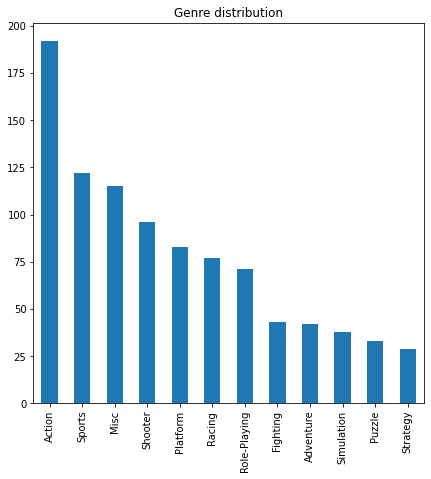

In [25]:
plt.figure(figsize=(7,7))
b["Genre"].value_counts().plot(kind="bar") 
plt.title("Genre distribution")

In [26]:
data.dropna(inplace=True)

In [27]:
uni=data['Year'].unique()
uni

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  int64  
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


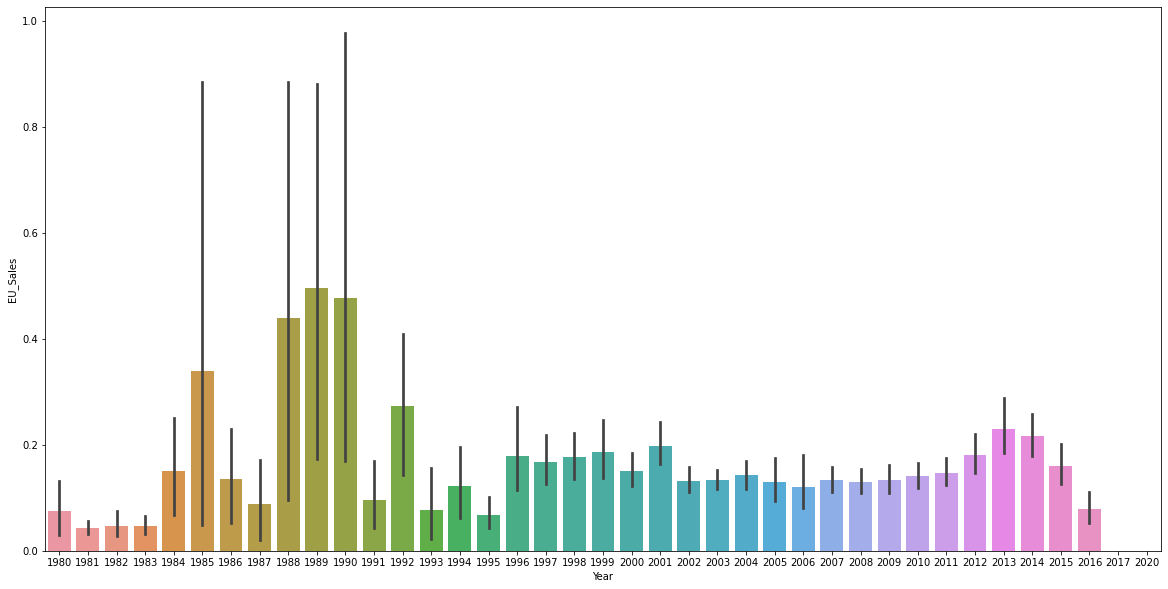

In [29]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Year',y= 'EU_Sales') 
plt.show()

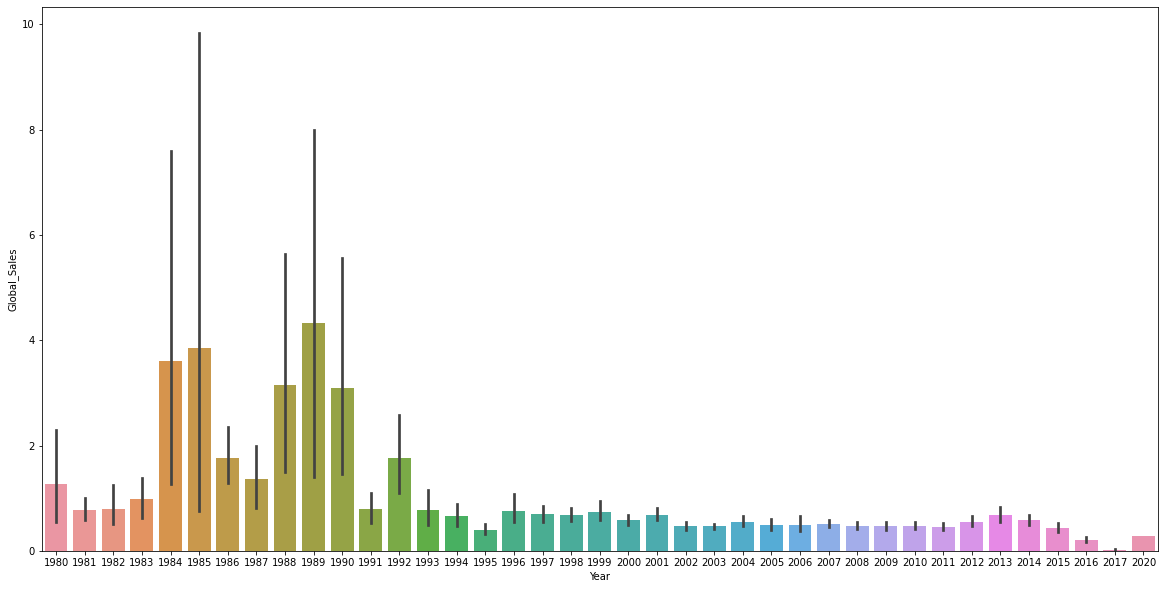

In [30]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Year',y= 'Global_Sales') 
plt.show()

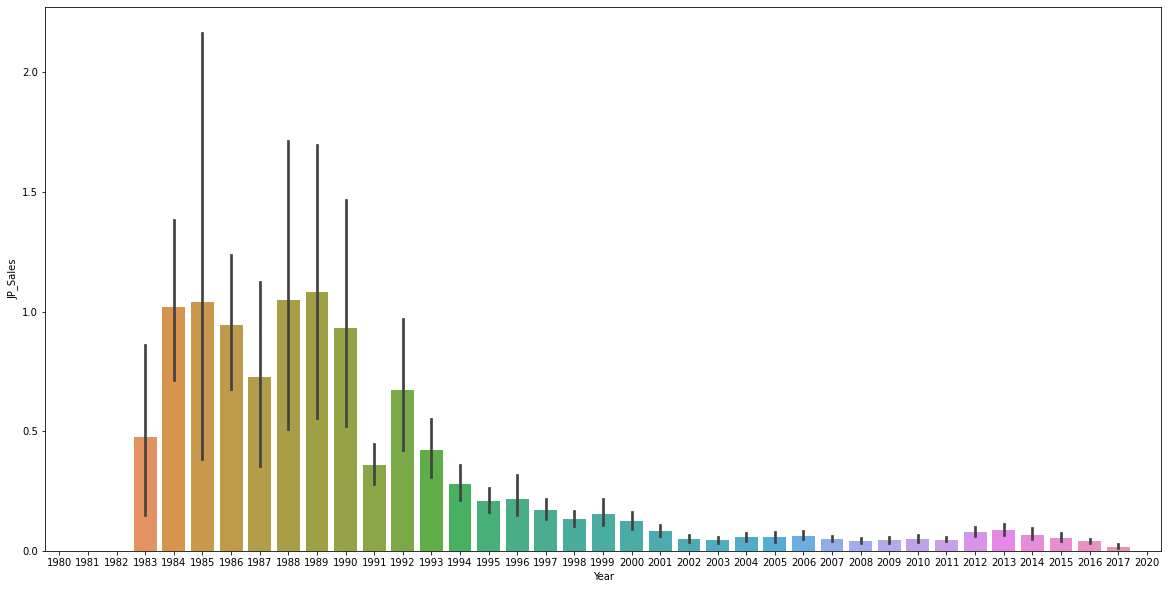

In [31]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Year',y= 'JP_Sales') 
plt.show()

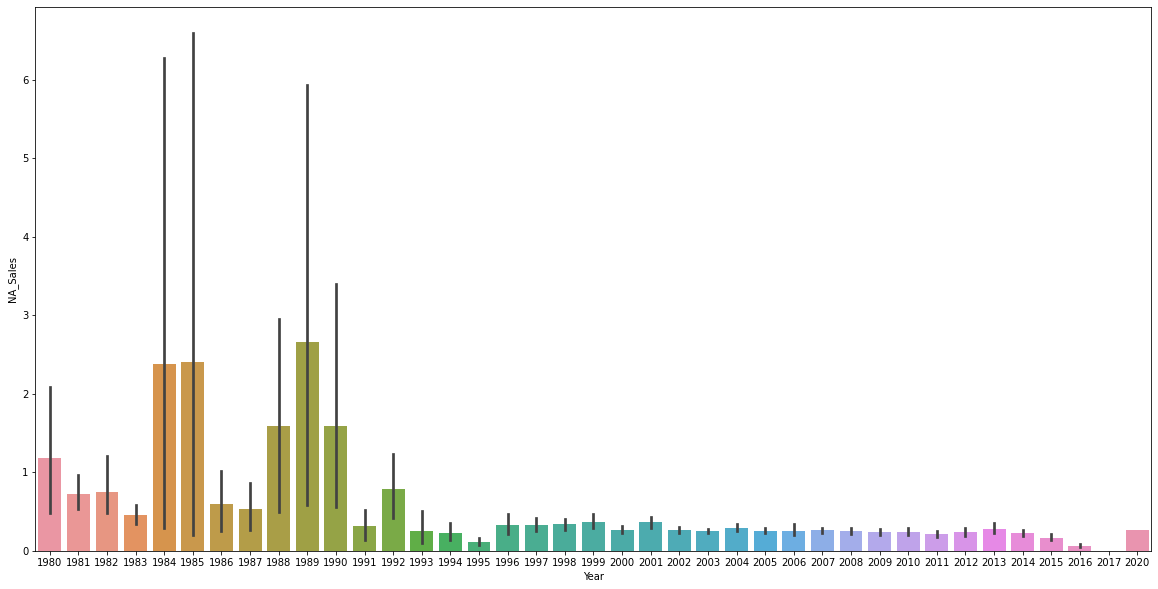

In [32]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Year',y= 'NA_Sales') 
plt.show()

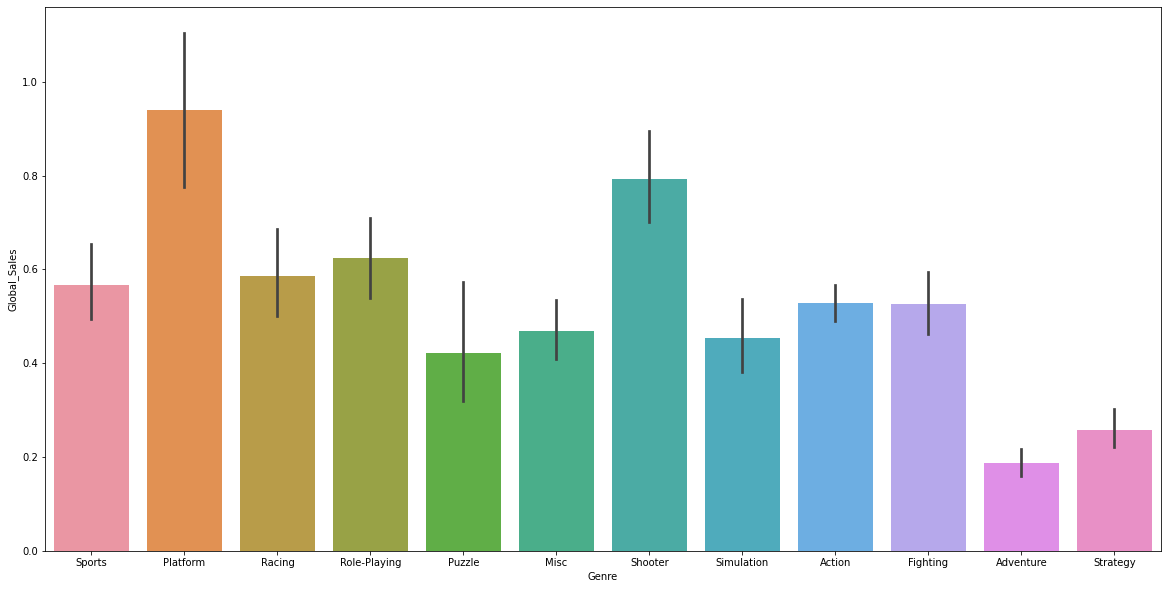

In [33]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Genre',y= 'Global_Sales') 
plt.show()

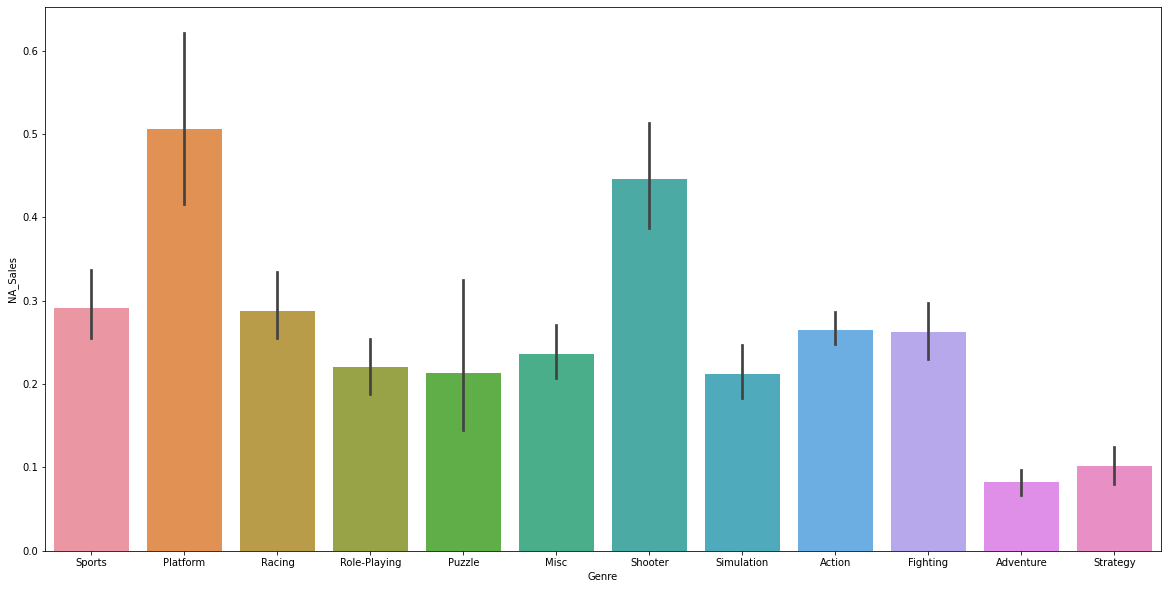

In [34]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Genre',y= 'NA_Sales') 
plt.show()

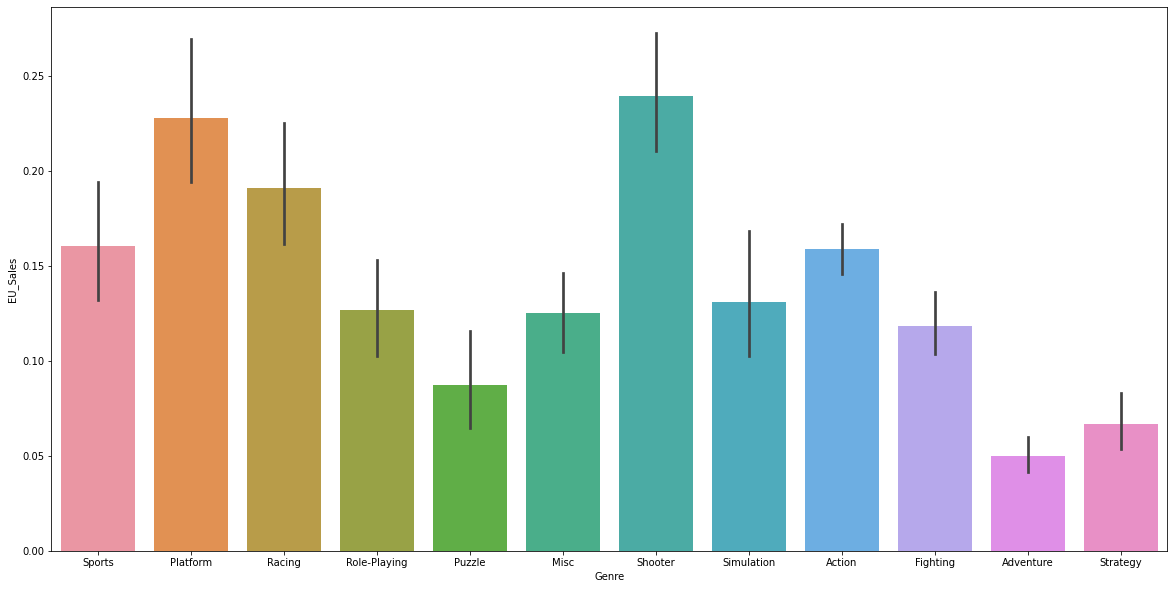

In [35]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Genre',y= 'EU_Sales') 
plt.show()

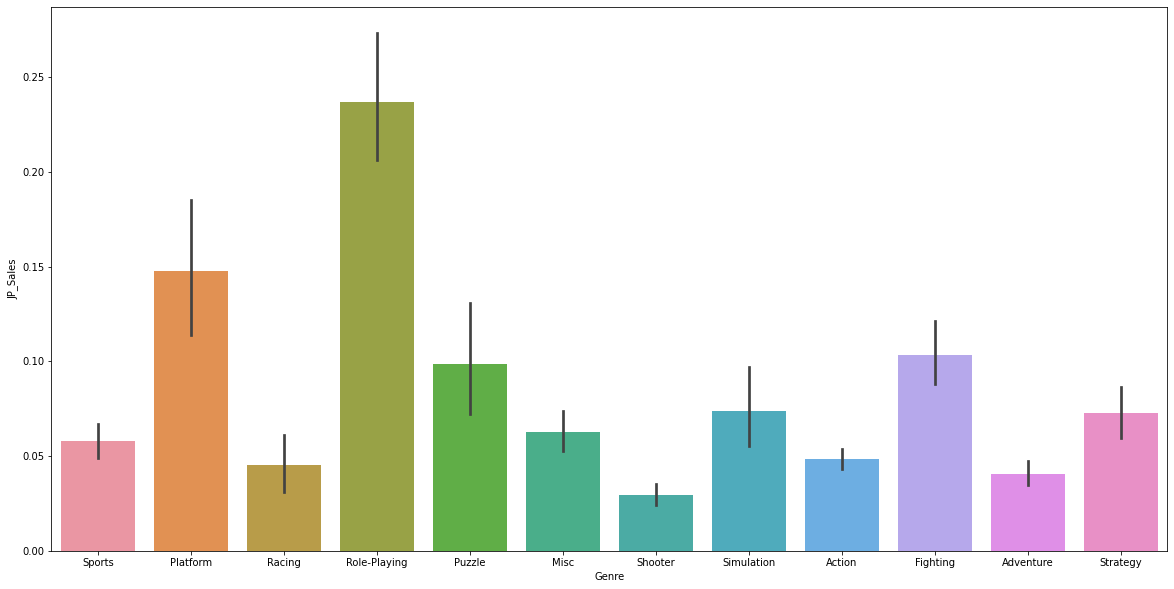

In [36]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Genre',y= 'JP_Sales') 
plt.show()

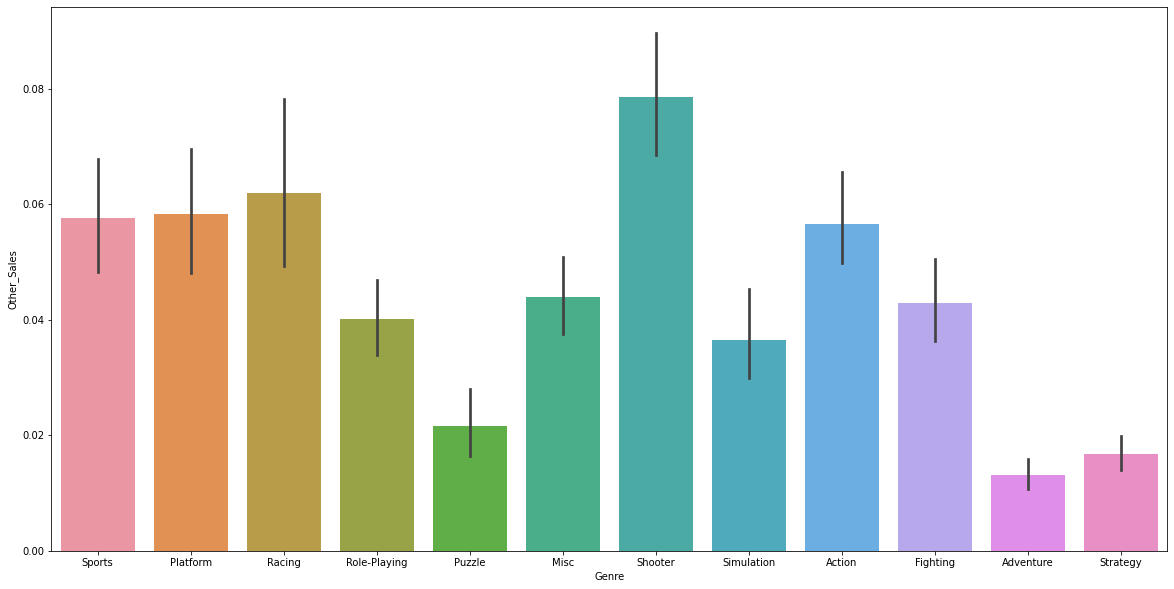

In [37]:
plt.figure(figsize=(20,10)) 
sns.barplot(data=data,x='Genre',y= 'Other_Sales') 
plt.show()

In [38]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
c= data.groupby(["Year"])
c

In [40]:
for i in c:
    print(i)

(1980,       Rank             Name Platform  ...  JP_Sales Other_Sales Global_Sales
258    259        Asteroids     2600  ...       0.0        0.05         4.31
544    545  Missile Command     2600  ...       0.0        0.03         2.76
1766  1768          Kaboom!     2600  ...       0.0        0.01         1.15
1969  1971         Defender     2600  ...       0.0        0.01         1.05
2669  2671           Boxing     2600  ...       0.0        0.01         0.77
4025  4027       Ice Hockey     2600  ...       0.0        0.01         0.49
5366  5368          Freeway     2600  ...       0.0        0.00         0.34
6317  6319           Bridge     2600  ...       0.0        0.00         0.27
6896  6898         Checkers     2600  ...       0.0        0.00         0.24

[9 rows x 11 columns])
(1981,       Rank                                Name  ... Other_Sales  Global_Sales
239    240                            Pitfall!  ...        0.05          4.50
734    736                          

In [41]:
d = c.get_group(2006)
d

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
...,...,...,...,...,...,...,...,...,...,...,...
16513,16516,Deal or No Deal,PC,2006,Misc,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01
16520,16523,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16523,16526,Style Book: Cinnamoroll,DS,2006,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16547,16550,Bookworm Deluxe,PC,2006,Puzzle,PopCap Games,0.01,0.00,0.00,0.00,0.01


Text(0.5, 1.0, 'Genre distribution')

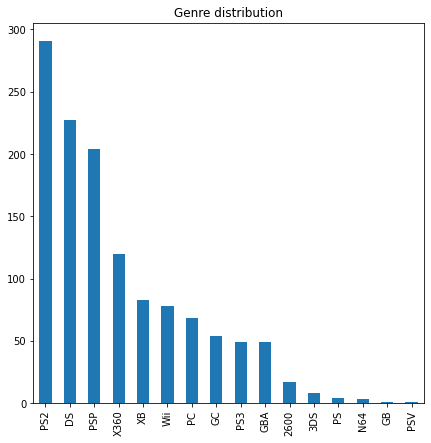

In [42]:
plt.figure(figsize=(7,7))
d["Platform"].value_counts().plot(kind="bar") 
plt.title("Genre distribution")


In [43]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [44]:
data[['Name','Global_Sales']].sort_values('Global_Sales' , ascending=True).head(5)

,Name,Global_Sales
16597,Spirits & Spells,0.01
16185,Tantei Jinguuji Saburo: Hai to Diamond,0.01
16184,Fatal Fury: Battle Archives Volume 2 (JP sales),0.01
16183,Sakura-Sou no Pet na Kanojo,0.01
16182,Princess Arthur,0.01


In [45]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [47]:
data['Name'].loc[(data["Platform"]=='GC')]

107                  Super Smash Bros. Melee
110                Mario Kart: Double Dash!!
135                     Super Mario Sunshine
232      The Legend of Zelda: The Wind Waker
356                          Luigi's Mansion
                        ...                 
16427                           Virtua Quest
16464           Egg Mania: Eggstreme Madness
16475                          Space Raiders
16584                       Bust-A-Move 3000
16594          Men in Black II: Alien Escape
Name: Name, Length: 556, dtype: object

In [49]:
data1 = data.loc[data["Year"]==2006]

In [50]:
data1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
...,...,...,...,...,...,...,...,...,...,...,...
16513,16516,Deal or No Deal,PC,2006,Misc,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01
16520,16523,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16523,16526,Style Book: Cinnamoroll,DS,2006,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16547,16550,Bookworm Deluxe,PC,2006,Puzzle,PopCap Games,0.01,0.00,0.00,0.00,0.01
